# 1. Import the libraries

In [1]:
#pip install librosa

In [2]:
#pip install pickle-mixin

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import sys
import os
import pickle
import librosa
import librosa.display
import IPython
#import sweetviz as sv
#import pandas_profiling
from IPython.display import Audio
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import normalize
from sklearn.model_selection import StratifiedShuffleSplit

pd.set_option('display.max_columns',None)

# 2. Read and understand the data

In [2]:
df = pd.read_csv('./Data/features_3_sec.csv')
df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,zero_crossing_rate_mean,zero_crossing_rate_var,harmony_mean,harmony_var,perceptr_mean,perceptr_var,tempo,mfcc1_mean,mfcc1_var,mfcc2_mean,mfcc2_var,mfcc3_mean,mfcc3_var,mfcc4_mean,mfcc4_var,mfcc5_mean,mfcc5_var,mfcc6_mean,mfcc6_var,mfcc7_mean,mfcc7_var,mfcc8_mean,mfcc8_var,mfcc9_mean,mfcc9_var,mfcc10_mean,mfcc10_var,mfcc11_mean,mfcc11_var,mfcc12_mean,mfcc12_var,mfcc13_mean,mfcc13_var,mfcc14_mean,mfcc14_var,mfcc15_mean,mfcc15_var,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,3714.560359,1.080790e+06,0.081851,0.000558,-0.000078,0.008354,-0.000068,0.005535,129.199219,-118.627914,2440.286621,125.083626,260.956909,-23.443724,364.081726,41.321484,181.694855,-5.976108,152.963135,20.115141,75.652298,-16.045410,40.227104,17.855198,84.320282,-14.633434,83.437233,10.270527,97.001335,-9.708279,66.669891,10.183875,45.103611,-4.681614,34.169498,8.417439,48.269444,-7.233477,42.770947,-2.853603,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,3869.682242,6.722448e+05,0.087173,0.001030,-0.000099,0.004950,-0.000103,0.004854,123.046875,-125.590706,2038.344238,122.421227,216.774185,-20.718019,231.979767,50.128387,142.700409,-11.333302,139.243118,21.385401,77.817947,-15.960796,97.364029,19.454103,57.948093,-12.465918,68.271523,17.898169,56.222176,-11.732554,54.373909,8.145000,40.662876,-7.717751,30.808521,8.397150,48.784225,-8.300493,68.584824,4.074709,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,3997.639160,7.907127e+05,0.071383,0.000425,-0.000066,0.012476,0.000065,0.004357,123.046875,-132.441940,3798.532227,115.085175,257.321289,-14.811666,192.448074,50.189293,144.166031,-0.680819,128.376892,24.650375,66.371170,-13.506104,89.319336,15.643386,55.253967,-13.216637,120.308784,10.406025,35.757862,-7.991465,47.911613,11.853963,36.569931,-4.677677,40.725075,6.571110,30.686846,-2.424750,50.313499,4.806280,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,3568.300218,9.216524e+05,0.069426,0.000304,-0.000014,0.008318,0.000018,0.005927,123.046875,-118.231087,2508.781006,132.116501,332.650574,-18.758335,109.357529,39.769306,184.693344,-13.260426,144.398224,20.468134,122.516464,-14.563448,68.937332,18.745104,74.748886,-13.755463,73.868576,12.993759,41.549564,-12.648887,58.540478,10.389314,39.102024,-4.362739,60.714748,9.156193,40.411537,-9.889441,44.666325,-1.359111,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,3469.992864,6.102111e+05,0.070095,0.000289,0.000041,0.009634,-0.000106,0.005833,123.046875,-105.968376,2118.919922,134.643646,219.562622,-19.961748,171.878754,40.171753,103.120712,-14.271939,102.651230,18.734617,79.070000,-15.619381,48.510284,19.207966,53.642956,-18.274683,95.300995,14.316693,58.821163,-5.792194,55.030254,17.045437,43.229939,-5.681399,46.515259,5.705521,24.956211,-7.986080,39.816933,2.092937,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [3]:
df.shape

(9990, 60)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9990 entries, 0 to 9989
Data columns (total 60 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   filename                 9990 non-null   object 
 1   length                   9990 non-null   int64  
 2   chroma_stft_mean         9990 non-null   float64
 3   chroma_stft_var          9990 non-null   float64
 4   rms_mean                 9990 non-null   float64
 5   rms_var                  9990 non-null   float64
 6   spectral_centroid_mean   9990 non-null   float64
 7   spectral_centroid_var    9990 non-null   float64
 8   spectral_bandwidth_mean  9990 non-null   float64
 9   spectral_bandwidth_var   9990 non-null   float64
 10  rolloff_mean             9990 non-null   float64
 11  rolloff_var              9990 non-null   float64
 12  zero_crossing_rate_mean  9990 non-null   float64
 13  zero_crossing_rate_var   9990 non-null   float64
 14  harmony_mean            

In [5]:
df.describe()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,zero_crossing_rate_mean,zero_crossing_rate_var,harmony_mean,harmony_var,perceptr_mean,perceptr_var,tempo,mfcc1_mean,mfcc1_var,mfcc2_mean,mfcc2_var,mfcc3_mean,mfcc3_var,mfcc4_mean,mfcc4_var,mfcc5_mean,mfcc5_var,mfcc6_mean,mfcc6_var,mfcc7_mean,mfcc7_var,mfcc8_mean,mfcc8_var,mfcc9_mean,mfcc9_var,mfcc10_mean,mfcc10_var,mfcc11_mean,mfcc11_var,mfcc12_mean,mfcc12_var,mfcc13_mean,mfcc13_var,mfcc14_mean,mfcc14_var,mfcc15_mean,mfcc15_var,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
count,9990.0,9990.000000,9990.000000,9990.000000,9.990000e+03,9990.000000,9.990000e+03,9990.000000,9.990000e+03,9990.000000,9.990000e+03,9990.000000,9990.000000,9990.000000,9.990000e+03,9990.000000,9.990000e+03,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000
mean,66149.0,0.379534,0.084876,0.130859,2.676388e-03,2199.219431,4.166727e+05,2241.385959,1.182711e+05,4566.076592,1.628790e+06,0.102578,0.002620,-0.000365,1.259757e-02,-0.000396,5.601553e-03,124.887709,-145.424643,2808.904199,100.988234,588.795354,-9.995014,374.137619,37.243725,183.911272,-2.009099,143.817714,15.395436,107.784375,-5.823034,98.505164,10.766659,74.795022,-7.569825,74.309310,8.283669,68.803998,-6.504168,63.812684,4.936315,57.790413,-5.186272,57.130389,2.164629,54.069345,-4.175271,52.678281,1.448240,49.988755,-4.198706,51.962753,0.739943,52.488851,-2.497306,54.973829,-0.917584,57.322614
std,0.0,0.090466,0.009637,0.068545,3.585628e-03,751.860611,4.349644e+05,543.854449,1.013505e+05,1642.065335,1.489398e+06,0.045651,0.003614,0.001699,1.263324e-02,0.001108,6.653225e-03,32.911676,106.456350,2596.256821,34.673178,459.705227,23.972522,294.470578,17.804460,133.164251,13.568717,109.272584,12.652512,75.900398,11.088698,65.536682,11.123007,45.881275,9.368422,44.733012,8.841558,41.864203,7.821168,40.218357,7.563187,37.481013,7.132049,35.746539,6.084283,37.715592,5.929457,37.251966,5.735149,34.442816,5.677379,36.400669,5.181313,38.177120,5.111799,41.585677,5.253243,46.444212
min,66149.0,0.107108,0.015345,0.000953,4.379535e-08,472.741636,8.118813e+02,499.162910,1.183520e+03,658.336276,1.145102e+03,0.013525,0.000005,-0.026672,9.312309e-23,-0.008794,4.672045e-08,24.377211,-662.171631,25.190538,-12.053392,9.665931,-104.249832,2.055229,-35.138493,3.540373,-47.886780,9.754141,-34.889263,5.267811,-45.187019,7.561506,-40.323467,6.899100,-39.451752,8.252314,-32.833546,7.584913,-40.008194,4.998892,-23.759195,2.345633,-29.350500,7.806118,-23.390091,3.230073,-30.467087,1.481917,-26.850016,1.325786,-27.809795,1.624544,-20.733809,3.437439,-27.448456,3.065302,-35.640659,0.282131
25%,66149.0,0.315698,0.079833,0.083782,6.145900e-04,1630.680158,1.231961e+05,1887.455790,4.876553e+04,3378.311110,5.595514e+05,0.067290,0.000628,-0.000127,4.086402e-03,-0.000579,1.106077e-03,103.359375,-201.474651,1143.226685,76.043871,270.420326,-26.884581,174.570415,24.450934,88.392767,-11.881086,67.975819,5.759286,53.944843,-14.464527,51.585960,2.528776,42.255037,-14.569940,42.856218,1.734222,40.205816,-12.203228,37.617884,-0.433691,34.455327,-10.352716,34.844897,-1.860355,32.415298,-8.184258,31.237773,-2.227478,29.584894,-7.951722,29.863448,-2.516638,29.636197,-5.734123,30.496412,-4.004475,30.011365
50%,66149.0,0.384741,0.085108,0.121253,1.491318e-03,2208.628236,2.650692e+05,2230.575595,8.996072e+04,4631.377892,1.160080e+06,0.097868,0.001390,-0.000013,8.429785e-03

In [6]:
df = df.drop(['filename','length'],axis = 1)

In [ ]:
audio_recording = './Data/genres_original/classical/classical.00077.wav'

# loads and decodes the audio as a time series y
# sr = sampling rate of y. It is the number of samples per second.
data,sr = librosa.load(audio_recording) 

print(type(data),type(sr))

In [ ]:
# play audio in the notebook
IPython.display.Audio(data, rate=sr)

## Raw Wave Plot

In [ ]:
plt.figure(figsize = (12,4))
librosa.display.waveshow(data, color = '#2B4F72')
plt.show()

## Spectrograms

In [ ]:
stft = librosa.stft(data)
stft_db = librosa.amplitude_to_db(abs(stft))
plt.figure(figsize=(14,6))
librosa.display.specshow(stft, sr=sr, x_axis = 'time', y_axis = 'hz')
plt.colorbar()

## Spectral Rolloff

the frequency below which a specified percentage of the total spectral energy, e.g. 85% lies

In [ ]:
spectral_rolloff = librosa.feature.spectral_rolloff(data+0.01, sr = sr) [0]
plt.figure(figsize = (12,4))
librosa.display.waveshow(data, sr = sr, alpha = 0.4, color = '#2B4F72')

In [ ]:
import librosa.display as lplt
chroma = librosa.feature.chroma_stft(data, sr = sr)
plt.figure(figsize = (16,6))
lplt.specshow(chroma, sr=sr, x_axis='time', y_axis ='chroma',cmap = 'coolwarm')
plt.colorbar()
plt.title('Chroma Features')
plt.show()

## Zero Crossing Rate

In [ ]:
start = 1000
end = 1200
plt.figure(figsize = (14,5))
plt.plot(data[start:end], color = '#2B4F72')
plt.grid()

In [ ]:
zero_cross_rate = librosa.zero_crossings(data[start:end],pad = False)
print('The number of zero-crossing is:',sum(zero_cross_rate))

# 3. Data Preprocessing

Encoding 10 category of music.

In [7]:
class_list = df.iloc[:,-1]
convertor = LabelEncoder()

In [8]:
y = convertor.fit_transform(class_list)
y

array([0, 0, 0, ..., 9, 9, 9])

In [9]:
X = df.iloc[:,:-1]

In [10]:
sss=StratifiedShuffleSplit(n_splits=5,test_size=0.3,random_state=123)

for train_index, test_index in sss.split(df, df["label"]):
    X_train = X.iloc[train_index]
    y_train = y[train_index]
    X_test = X.iloc[test_index]
    y_test = y[test_index]

In [11]:
len(y_train)

6993

In [12]:
len(y_test)

2997

In [13]:
X_train

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,zero_crossing_rate_mean,zero_crossing_rate_var,harmony_mean,harmony_var,perceptr_mean,perceptr_var,tempo,mfcc1_mean,mfcc1_var,mfcc2_mean,mfcc2_var,mfcc3_mean,mfcc3_var,mfcc4_mean,mfcc4_var,mfcc5_mean,mfcc5_var,mfcc6_mean,mfcc6_var,mfcc7_mean,mfcc7_var,mfcc8_mean,mfcc8_var,mfcc9_mean,mfcc9_var,mfcc10_mean,mfcc10_var,mfcc11_mean,mfcc11_var,mfcc12_mean,mfcc12_var,mfcc13_mean,mfcc13_var,mfcc14_mean,mfcc14_var,mfcc15_mean,mfcc15_var,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
9735,0.425338,0.076606,0.142477,0.001422,2091.341819,6.483514e+04,2228.274900,25058.757781,4678.999399,2.635368e+05,0.087797,0.000447,-0.001309,0.011157,0.000367,0.005531,112.347147,-88.551247,1557.838501,103.338684,82.973969,-19.611280,175.474014,57.369957,63.891270,-12.308954,41.385139,32.316166,23.918739,-12.186553,42.989971,19.543634,27.284126,-12.962147,27.018253,14.489752,30.220661,-12.354815,22.803024,9.214049,26.539179,-11.376347,23.290918,10.610539,22.964138,-4.007595,36.155365,9.275036,41.678440,-6.949260,26.883024,1.018734,32.271904,-4.188848,21.342682,0.299470,24.692549
363,0.260271,0.095761,0.168989,0.002880,1151.066007,2.536883e+05,1827.537227,241861.037623,2363.517503,3.470203e+06,0.032125,0.000209,0.000061,0.026251,0.000009,0.001546,161.499023,-215.725067,2063.487305,124.329849,479.160217,16.778189,155.359772,29.734970,281.445862,2.668137,149.922897,23.158369,74.770790,-17.620153,210.884705,10.402098,139.036530,-30.010464,123.826721,-5.021870,113.220497,-26.873192,90.819038,-13.490747,71.076286,-16.850788,67.224670,-9.352382,50.813469,-13.593806,55.031708,-17.634266,84.725388,-17.596567,62.810360,-11.672452,65.765762,-15.232347,41.584129,-7.499082,115.793411
9576,0.317994,0.080282,0.081217,0.000278,2074.686733,1.332049e+06,2553.206375,249419.573457,4358.237492,5.388836e+06,0.086801,0.007836,-0.001720,0.004927,-0.001577,0.000722,135.999178,-165.230591,3486.307373,111.950989,1106.115234,23.477989,366.533569,14.226031,201.630264,6.613810,54.568363,3.975349,70.640907,1.533272,32.930550,-2.698909,36.182610,-4.481961,37.625389,-1.182850,41.657997,-0.373572,47.737274,-3.602039,40.775234,-2.788740,28.388577,-1.018645,31.165096,0.871475,35.811321,-2.836236,43.294006,-2.369203,36.528908,-1.799726,44.944553,-4.809090,43.440617,-2.248104,49.241661
9337,0.360469,0.078215,0.202239,0.000332,2671.848548,1.081107e+05,2707.286940,43427.041587,6049.422138,5.739138e+05,0.117225,0.000531,0.000069,0.029153,0.001597,0.003820,135.999178,-25.413576,348.626862,72.016632,117.602631,-2.691272,100.855774,29.711586,71.474403,9.781483,56.677929,12.284821,48.315384,-2.954828,49.540154,9.417058,37.714176,-4.776865,43.990669,16.612440,34.154419,2.692542,36.615173,1.808869,21.545332,-2.483868,33.344791,-2.569688,24.645191,-3.927094,26.299475,2.174983,19.318937,-2.983109,14.995863,-1.417879,31.058353,-6.900303,26.170933,-7.385243,31.631321
4410,0.400962,0.092372,0.199404,0.009746,2790.763211,8.005098e+05,2715.939962,101507.422061,5662.901142,2.350873e+06,0.120207,0.005861,0.000012,0.025361,0.000007,0.013216,92.285156,-69.682259,2946.022949,61.486099,713.183350,2.500005,353.445251,41.205410,217.088104,11.461234,263.450989,6.685068,140.235596,7.806849,105.377007,0.836158,107.801147,4.654576,60.798248,8.138873,89.848404,3.785899,76.312508,-0.589056,58.246510,2.581104,60.243847,2.230290,56.744076,-5.525421,90.195625,-7.053430,63.141888,-9.952040,41.215363,-6.863829,41.550308,-8.125879,98.321411,-1.312383,117.146881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3938,0.415698,0.080752,0.098523,0.000986,2019.523069,3.261613e+05,2266.924850,121155.031860,4734.737267,1.54

In [14]:
#analyze_report = sv.analyze(X_train)
#analyze_report.show_html('EDA_train.html')

The mean of music feature follows normal distribution.

There is slight skewness with the variance of music feature. It is not reasonable to apply logorithms on variance. Therefore, we only apply z scaling on data.

In [15]:
#Use the mean and std from trainning set to do scaling
X_test = (X_test - X_train.mean())/ X_train.std()

In [16]:
from sklearn.preprocessing import StandardScaler
fit = StandardScaler()
X_train = fit.fit_transform(X_train)

In [17]:
X_train = np.array(X_train,dtype = float)
X_test = np.array(X_test,dtype = float)

In [18]:
a = pd.DataFrame(X_train)
a

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56
0,0.503176,-0.855541,0.167013,-0.351624,-0.146417,-0.813387,-0.026084,-0.925007,0.065900,-0.920558,-0.325150,-0.596254,-0.573170,-0.117504,0.690896,-0.012285,-0.382942,0.536866,-0.485500,0.070758,-1.108624,-0.401866,-0.674944,1.130191,-0.902786,-0.756474,-0.947472,1.346176,-1.110185,-0.576107,-0.850968,0.791972,-1.042376,-0.582458,-1.044610,0.710831,-0.926350,-0.741736,-1.022372,0.566946,-0.837060,-0.861079,-0.968285,1.387664,-0.818525,0.024419,-0.449991,1.361460,-0.242085,-0.483263,-0.694886,0.055966,-0.526047,-0.329367,-0.804543,0.231227,-0.712535
1,-1.320430,1.117446,0.552371,0.052881,-1.392902,-0.378183,-0.762102,1.225243,-1.341995,1.241782,-1.535391,-0.660689,0.249459,1.064383,0.364035,-0.607065,1.120847,-0.663516,-0.290114,0.674241,-0.245490,1.115129,-0.743323,-0.421394,0.724534,0.345414,0.055912,0.620343,-0.438046,-1.065410,1.729661,-0.030981,1.417996,-2.401669,1.098026,-1.507078,1.079114,-2.587258,0.674696,-2.421819,0.355227,-1.625432,0.293090,-1.895840,-0.083906,-1.593802,0.071836,-3.300705,0.999586,-2.338452,0.298555,-2.396531,0.348258,-2.475168,-0.317655,-1.248754,1.300033
2,-0.682725,-0.476904,-0.723407,-0.668899,-0.168496,2.106851,0.570705,1.300209,-0.129135,2.535568,-0.346788,1.408495,-0.819464,-0.605358,-1.081954,-0.730195,0.340685,-0.186903,0.259673,0.318356,1.120398,1.394429,-0.025431,-1.292154,0.127509,0.635703,-0.825599,-0.900075,-0.492633,0.659381,-1.005586,-1.210379,-0.846464,0.322455,-0.809845,-1.070692,-0.649998,0.781275,-0.400238,-1.120111,-0.455951,0.337939,-0.821927,-0.525106,-0.602197,0.848041,-0.459502,-0.736876,-0.195485,0.314768,-0.428164,-0.488685,-0.195247,-0.449882,-0.272999,-0.252242,-0.170205
3,-0.213470,-0.689774,1.035664,-0.653833,0.623137,-0.713660,0.853698,-0.742830,0.899165,-0.711263,0.314591,-0.573283,0.254171,1.291690,1.812395,-0.267643,0.340685,1.132816,-0.952748,-0.829732,-1.033182,0.303491,-0.928611,-0.422707,-0.846064,0.868754,-0.806097,-0.241478,-0.787721,0.255222,-0.750288,-0.119658,-0.812745,0.290986,-0.668964,0.952119,-0.831301,1.171028,-0.677745,-0.407841,-0.970748,0.380506,-0.679630,-0.780221,-0.774182,0.038008,-0.722452,0.131342,-0.887035,0.207801,-1.023583,-0.414895,-0.557725,-0.856215,-0.688404,-1.227150,-0.559246
4,0.233880,0.768302,0.994449,1.957472,0.780777,0.881942,0.869591,-0.166787,0.664147,0.486988,0.379422,0.872537,0.220301,0.994740,0.362051,1.134999,-0.996734,0.714968,0.050903,-1.132478,0.264354,0.519904,-0.069925,0.222622,0.243135,0.992335,1.105429,-0.685306,0.427238,1.224325,0.107953,-0.892140,0.730309,1.297407,-0.296967,-0.011081,0.514391,1.310011,0.312743,-0.723494,0.011766,1.087687,0.092665,0.009280,0.072533,-0.231801,1.043926,-1.467525,0.377019,-1.006468,-0.298577,-1.467293,-0.283849,-1.094349,1.047105,-0.074665,1.329934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6988,0.396681,-0.428510,-0.471860,-0.472515,-0.241624,-0.211173,0.044903,0.028078,0.099790,-0.059639,-0.394636,-0.440173,0.209113,-0.583590,-0.320137,-0.523778,0.340685,0.038207,-0.130632,0.402771,0.041819,0.278430,-1.002281,0.425414,-0.702251,-1.119598,-0.720464,1.317677,-0.576307,-0.900690,-0.320537,1.269748,-0.512552,-0.363365,-0.639759,0.489869,-0.687888,-0.769528,-1.159283,0.345885,-0.937994,0.052189,-0.515342,0.636288,-0.583456,-0.924661,-0.803068,0.159924,-0.524382,-0.243144,-0.697096,-0.576548,-0.575835,-0.541201,-1.009320,1.860281,-0.854828
6989,-0.301834,0.064432,-0.268229,-0.114873,-0.920008,-0.669847,-1.074291,-0.549849,-1.070921,-0.966322,-0.557041,-0.342727,0.279942,-0.213611,0.329137,-0.530236,0.830198,-0.160785,0.716482,1.178951,-0.356067,-1.367057,-0.245758,0.150221,-0.769350,1.423474,1.649279,-1.612599,-0.535672,1.217937,-0.607025,-0.362

In [19]:
a = pd.DataFrame(X_test)
a

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56
0,-1.206145,1.360194,-0.165985,0.604121,-1.511716,-0.779471,-1.728168,-0.809554,-1.550918,-0.855368,-1.142238,-0.583464,0.205214,0.291880,0.397981,-0.685828,1.826576,-0.827919,0.837790,2.017959,0.009626,-1.118956,0.489864,-0.500469,1.399895,1.399251,1.228117,-1.308605,0.089529,0.630381,1.551140,-1.683434,1.161310,-0.208906,-0.154801,-0.604771,-0.846281,0.456316,0.160942,-0.809472,-0.730052,0.298278,-1.000785,-2.215670,-0.101725,0.410439,0.770176,-0.506352,-0.320738,-2.339476,0.955847,-1.453654,-0.169109,1.236887,-0.511834,-0.680828,-0.533506
1,0.000272,2.078049,0.585898,1.880486,0.614935,0.148137,0.742921,-0.191898,0.939434,-0.136605,0.280114,0.040803,0.715185,-0.486628,3.439407,2.822363,-0.055583,0.428928,0.785077,-0.420916,-0.353188,0.764060,0.185675,-0.107666,1.048381,-1.148997,1.281238,0.413469,1.610553,-0.861625,0.052825,0.778892,0.584449,-0.878796,-0.117779,1.373781,2.001309,-0.763666,1.401175,0.858575,1.419222,-1.453684,0.058441,0.751981,0.925327,-1.326331,1.113881,-0.252012,0.462897,-1.220228,0.954087,-0.109431,1.433244,0.271796,3.190774,0.176784,0.691788
2,2.491418,-2.140046,-0.459339,0.166387,0.665998,0.123843,0.863731,-0.745859,1.074232,-0.664343,0.626863,0.846549,0.150047,-0.777666,-0.707809,0.161898,-0.055583,-0.063267,0.636130,-0.628275,-0.035987,0.563236,0.772168,-0.357960,2.760420,-0.531507,-0.033092,1.526115,0.812867,-0.580348,0.037221,1.481180,-0.617022,-0.793670,-0.421025,1.875303,-0.353100,-0.157832,-0.391787,0.648837,-0.485689,-0.287118,-0.387949,1.633127,-0.342576,-0.790047,-0.391858,0.491977,-0.496740,0.010250,-0.057185,1.424686,-0.347488,0.538377,-0.296802,1.571520,-0.285922
3,0.741492,-0.953491,-0.560258,-0.699976,0.904853,-0.286344,0.698341,-0.596462,0.831828,-0.523977,0.927565,-0.046781,0.211703,-0.656224,0.271838,-0.602775,0.830139,0.521736,-0.845937,-1.054141,-0.875030,-0.176082,-0.664141,0.677095,-0.394410,1.077121,-0.689894,0.713503,-0.773217,0.396356,-0.495420,0.884534,-0.502886,0.084961,-1.056233,0.214345,-0.450551,0.253110,-0.758462,0.388429,-0.637819,-0.969560,-1.074356,1.596823,-0.255591,-0.572249,-0.735300,0.910195,-0.401902,-0.754369,-0.877207,0.745636,-0.629360,-1.270347,-0.123085,0.581203,-0.656298
4,0.833315,-1.270916,-0.301942,-0.537449,2.198425,-0.190603,1.484695,-0.378954,1.795602,-0.310860,2.585301,-0.077074,0.217634,-0.633370,0.364238,-0.291694,-0.055583,0.793520,-0.508007,-1.934051,-0.813496,0.707752,-0.412123,-0.247233,0.101731,0.590998,0.248546,-0.949554,-0.592597,0.720014,0.678291,-0.614453,-0.032285,1.022566,-0.248318,-0.594525,-0.475858,1.090286,-0.680378,-0.529562,-0.797298,0.307604,-0.614534,-0.868365,-0.496602,0.573481,-0.441182,-1.081806,-0.628916,-0.127356,-0.103164,-0.291735,1.087675,0.484950,0.528383,-0.269842,0.318757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2992,0.816733,1.572090,0.882497,0.730644,-0.134560,0.217939,0.030217,0.223547,0.092331,0.028381,-0.564104,-0.166239,0.216935,-0.130249,-0.050203,1.403750,0.571803,0.243923,0.065306,-0.317580,0.974004,0.128698,0.535813,1.585307,1.729081,-0.380122,1.688947,0.976308,1.637670,0.026976,1.362274,0.907896,-0.437635,-0.390782,0.221722,0.708649,0.694588,-0.010183,0.437702,1.032801,-0.049316,-0.459667,0.108340,0.954592,0.516020,-1.183885,1.237863,-0.363293,0.074068,-0.957483,1.713471,1.125530,0.459715,0.130409,0.719397,0.534219,1.411863
2993,0.012275,0.197345,0.821272,-0.201012,-0.665605,1.379618,0.739801,3.041125,-0.461310,3.576465,-1.340311,-0.536267,0.326479,1.138602,1.105364,-0.370631,-2.023295,-0.202874,-0.095740,0.467701,0.944500,2.544702,0.657695,-0.845304,-0.196887,1.866631,0.223465,-0.951089,0.269640,2.163820,-0.017931,-0.232252,0.429136,1.397921,-0.001468,-0.087416,-0

# 4. Machine Learning

In [20]:
import warnings
warnings.filterwarnings("ignore")

In [21]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

### Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression


log_reg=LogisticRegression(multi_class="multinomial",solver="newton-cg")
log_reg.fit(X_train,y_train)
y_pred_log = log_reg.predict(X_test)

confusion_matrix(y_test, y_pred_log)

array([[213,   0,  20,   5,   6,  16,  22,   0,  11,   7],
       [  2, 275,   2,   1,   0,  16,   0,   0,   0,   3],
       [ 26,   0, 197,   7,   3,  12,   4,   5,   8,  37],
       [  9,   3,  12, 199,  13,   1,  12,  12,   9,  30],
       [ 13,   0,   5,  19, 196,   0,   9,  20,  33,   4],
       [ 11,  17,  20,   2,   0, 240,   0,   3,   5,   2],
       [ 10,   1,   4,  10,   6,   2, 238,   0,   1,  28],
       [  0,   2,  10,  20,  13,   1,   0, 233,   9,  12],
       [ 11,   0,  11,  14,  34,   2,   1,  19, 190,  18],
       [ 31,   2,  23,  38,   6,  15,  13,   5,  12, 155]], dtype=int64)

In [25]:
print(classification_report(y_test,y_pred_log))

              precision    recall  f1-score   support

           0       0.65      0.71      0.68       300
           1       0.92      0.92      0.92       299
           2       0.65      0.66      0.65       299
           3       0.63      0.66      0.65       300
           4       0.71      0.66      0.68       299
           5       0.79      0.80      0.79       300
           6       0.80      0.79      0.79       300
           7       0.78      0.78      0.78       300
           8       0.68      0.63      0.66       300
           9       0.52      0.52      0.52       300

    accuracy                           0.71      2997
   macro avg       0.71      0.71      0.71      2997
weighted avg       0.71      0.71      0.71      2997



In [28]:
train_acc = log_reg.score(X_train, y_train)
test_acc = log_reg.score(X_test, y_test)
print("For Logistic Regression, the training accuracy is:",round(train_acc,5), ", the testing accuracy is:", round(test_acc,5))

For Logistic Regression, the training accuracy is: 0.75075 , the testing accuracy is: 0.71271


##### Based on the python report, the Logistic Regression achieves 75% training accuracy and 71.3% testing accuracy in this case.

### K-Nearest Neighbor Classifier

In [31]:
from sklearn.neighbors import KNeighborsClassifier

n_lst = [3,5,10,20]
weight_lst = ['uniform', 'distance']

result = {
    "num_neighbor":[],
    "weight":[],
    "train_accuracy_score":[],
    "test_accuracy_score":[]
}

for n in n_lst:
    for weight in weight_lst:
        knn_model = KNeighborsClassifier(n_neighbors = n, weights = weight, algorithm = 'auto')
        knn_model.fit(X_train, y_train)
        train_acc = knn_model.score(X_train, y_train)
        test_acc = knn_model.score(X_test, y_test)
        
        result["num_neighbor"].append(n)
        result["weight"].append(weight)
        result["train_accuracy_score"].append(train_acc)    
        result["test_accuracy_score"].append(test_acc)     
        
knn_result = pd.DataFrame(result)
knn_result.sort_values(by='test_accuracy_score', ascending=False).head()

,num_neighbor,weight,train_accuracy_score,test_accuracy_score
1,3,distance,0.999142,0.898565
3,5,distance,0.999142,0.885219
0,3,uniform,0.950665,0.884551
2,5,uniform,0.929644,0.864865
5,10,distance,0.999142,0.854855


In [32]:
#Best KNN Model Performace
best_knn=KNeighborsClassifier(n_neighbors = 3, weights = 'distance')
best_knn.fit(X_train,y_train)
y_pred_knn=best_knn.predict(X_test)

confusion_matrix(y_test, y_pred_knn)

array([[268,   2,  10,   3,   1,   5,   0,   0,   9,   2],
       [  1, 277,   4,   0,   0,  16,   0,   0,   0,   1],
       [  5,   2, 253,   9,   1,   4,   0,   5,  12,   8],
       [  0,   2,   4, 281,   1,   2,   1,   3,   0,   6],
       [  1,   0,   3,   3, 269,   0,   1,   8,  13,   1],
       [  5,  18,  10,   1,   0, 261,   1,   1,   0,   3],
       [  1,   1,   0,   2,   2,   1, 286,   0,   0,   7],
       [  0,   2,   3,  15,   6,   0,   0, 261,   9,   4],
       [  0,   0,   6,   1,   4,   0,   0,   2, 284,   3],
       [  3,   1,  12,  15,   4,   4,   4,   3,   1, 253]], dtype=int64)

In [33]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.94      0.89      0.92       300
           1       0.91      0.93      0.92       299
           2       0.83      0.85      0.84       299
           3       0.85      0.94      0.89       300
           4       0.93      0.90      0.92       299
           5       0.89      0.87      0.88       300
           6       0.98      0.95      0.96       300
           7       0.92      0.87      0.90       300
           8       0.87      0.95      0.90       300
           9       0.88      0.84      0.86       300

    accuracy                           0.90      2997
   macro avg       0.90      0.90      0.90      2997
weighted avg       0.90      0.90      0.90      2997



In [36]:
train_acc = best_knn.score(X_train, y_train)
test_acc = best_knn.score(X_test, y_test)
print("For the optimal KNN model, the training accuracy is:",round(train_acc,5), ", the testing accuracy is:", round(test_acc,5))

For the optimal KNN model, the training accuracy is: 0.99914 , the testing accuracy is: 0.89857


##### Based on the python report, the KNN achieves 99.9% training accuracy and 89.9% testing accuracy in this case.

### Support Vector Classifier

In [37]:
from sklearn.svm import SVC

kernel_lst = ["linear", "poly", "rbf", "sigmoid"]
algos = ["ovo", "ovr"] #One vs One & One vs Rest

result = {
    "kernel":[],
    "algorithm":[],
    "train_accuracy_score":[],
    "test_accuracy_score":[]
}

for algo in algos:
    for kernel in kernel_lst:
        svc_model = SVC(kernel = kernel, decision_function_shape = algo)
        svc_model.fit(X_train, y_train)
        train_acc = svc_model.score(X_train, y_train)
        test_acc = svc_model.score(X_test, y_test)
        
        result["kernel"].append(kernel)
        result["algorithm"].append(algo)
        result["train_accuracy_score"].append(train_acc)    
        result["test_accuracy_score"].append(test_acc)     
        
svc_result = pd.DataFrame(result)
svc_result.sort_values(by='test_accuracy_score', ascending=False).head()

,kernel,algorithm,train_accuracy_score,test_accuracy_score
2,rbf,ovo,0.922351,0.849850
6,rbf,ovr,0.922351,0.849850
1,poly,ovo,0.884742,0.805472
5,poly,ovr,0.884742,0.805472
0,linear,ovo,0.811812,0.754421


In [38]:
best_svc = SVC(kernel = 'rbf', decision_function_shape = 'ovo')
best_svc.fit(X_train, y_train)

y_pred=best_svc.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       300
           1       0.88      0.97      0.92       299
           2       0.84      0.82      0.83       299
           3       0.79      0.83      0.81       300
           4       0.93      0.81      0.87       299
           5       0.87      0.89      0.88       300
           6       0.89      0.89      0.89       300
           7       0.90      0.83      0.86       300
           8       0.88      0.87      0.88       300
           9       0.71      0.70      0.71       300

    accuracy                           0.85      2997
   macro avg       0.85      0.85      0.85      2997
weighted avg       0.85      0.85      0.85      2997



In [39]:
train_acc = best_svc.score(X_train, y_train)
test_acc = best_svc.score(X_test, y_test)
print("For best SVC model, the training accuracy is:",round(train_acc,5), ", the testing accuracy is:", round(test_acc,5))

For best SVC model, the training accuracy is: 0.92235 , the testing accuracy is: 0.84985


##### Based on the python report, the optimal SVC achieves 92.2% training accuracy and 85.0% testing accuracy in this case.
##### We further explore more powerful tree-based models: Light GBM & XGBoost.

### XGBoost

In [22]:
#pip install xgboost
import xgboost as xgb

In [42]:
#Default XGB Model
default_xgb_model = xgb.XGBClassifier(
                objective='multi:softmax',
                eval_metric = 'merror',
                random_state = 7028
            )

default_xgb_model.fit(X_train, y_train)
train_acc = default_xgb_model.score(X_train, y_train)
test_acc = default_xgb_model.score(X_test, y_test)

print("For default XGB model, the training accuracy is:",round(train_acc,5), ", the testing accuracy is:", round(test_acc,5))

For default XGB model, the training accuracy is: 0.999 , the testing accuracy is: 0.90157


In [48]:
#First Tuning

lr_lst = [0.01, 0.05, 0.1]
ne_lst = [500, 1000, 2000]

result = {
    "learning_rate":[],
    "num_estimators":[],
    "accuracy_score":[]
}

for lr in lr_lst:
    for num_e in ne_lst:
        xgb_model = xgb.XGBClassifier(
                    learning_rate = lr,
                    n_estimators = num_e,
                    objective='multi:softmax',
                    eval_metric = 'merror',
                    random_state = 7028
                    )

        xgb_model.fit(X_train, y_train)
        acc = xgb_model.score(X_test, y_test)

        result["learning_rate"].append(lr)
        result["num_estimators"].append(num_e)
        result["accuracy_score"].append(acc)
        
xgb_result = pd.DataFrame(result)
xgb_result.sort_values(by='accuracy_score', ascending=False).head()

,learning_rate,num_estimators,accuracy_score
4,0.05,1000,0.907241
7,0.10,1000,0.907241
5,0.05,2000,0.906573
6,0.10,500,0.905239
8,0.10,2000,0.904571


In [50]:
#Second Tuning

lr = 0.05
num_e = 1000

gamma_lst = [0,0.1,1]
alpha_lst = [0,0.1,1]
lambda_lst = [0,0.1,1]

result = {
    "gamma":[],
    "alpha":[],
    "lambda":[],
    "accuracy_score":[]
}

for gamma in gamma_lst:
    for alpha in alpha_lst:
        for lbd in lambda_lst:
            xgb_model = xgb.XGBClassifier(
                        learning_rate = lr,
                        n_estimators = num_e,
                        gamma = gamma,
                        reg_alpha = alpha,
                        reg_lambda = lbd,
                        objective='multi:softmax',
                        eval_metric = 'merror',
                        random_state = 7028
                        )

            xgb_model.fit(X_train, y_train)
            acc = xgb_model.score(X_test, y_test)

            result["gamma"].append(gamma)
            result["alpha"].append(alpha)
            result["lambda"].append(lbd)
            result["accuracy_score"].append(acc)
        
xgb_result = pd.DataFrame(result)
xgb_result.sort_values(by='accuracy_score', ascending=False).head()

,gamma,alpha,lambda,accuracy_score
0,0.0,0.0,0.0,0.907241
2,0.0,0.0,1.0,0.907241
3,0.0,0.1,0.0,0.905572
1,0.0,0.0,0.1,0.904905
5,0.0,0.1,1.0,0.903904


In [23]:
#Based on the tuning result, the optimal XGBoost model is as follows:

best_xgb_model = xgb.XGBClassifier(
                    learning_rate = 0.05,
                    n_estimators = 1000,
                    gamma = 0,
                    reg_alpha = 0,
                    reg_lambda = 0,
                    objective='multi:softmax',
                    eval_metric = 'merror',
                    use_label_encoder=False,
                    random_state = 7028
                    )

best_xgb_model.fit(X_train, y_train)

train_acc = best_xgb_model.score(X_train, y_train)
test_acc = best_xgb_model.score(X_test, y_test)
print("For best xgb model, the training accuracy is:",round(train_acc,10), ", the testing accuracy is:", round(test_acc,10))

For best xgb model, the training accuracy is: 0.998998999 , the testing accuracy is: 0.9072405739


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

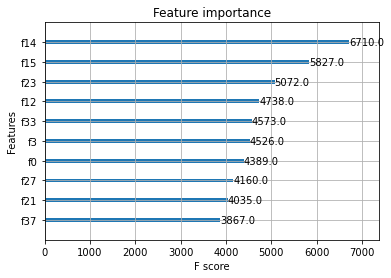

In [32]:
xgb.plot_importance(best_xgb_model, max_num_features = 10)

##### Based on the python report, the optimal XGBoost achieves 99.9% training accuracy and 90.7% testing accuracy in this case.